**Projeto de Análise de Desempenho em Partidas de Jogo Eletrônico utilizando Pandas**

Este projeto tem como objetivo realizar uma análise abrangente do desempenho das equipes em partidas do jogo League of Legends. Utilizando a biblioteca pandas em Python.

#Análise inicial dos dados

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
#Carregamento do Dataset
df = pd.read_csv('/content/drive/MyDrive/DataScience_Leandro/archive/match_data_2022.csv')
df

,gameid,teamname,top_playername,top_champion,top_kills,top_deaths,top_assists,top_firstbloodkill,top_firstbloodassist,top_firstbloodvictim,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2695708,LOUD,Robo,Renekton,3,6,5,0.0,0.0,0.0,...,511.0,1659.0,549.0,11.0,4.0,4.0,4.0,4.0,6.0,4.0
1,ESPORTSTMNT01_2695708,FURIA,fNb,Akali,4,4,5,0.0,0.0,0.0,...,522.0,-1659.0,-549.0,-11.0,4.0,6.0,4.0,4.0,4.0,4.0
2,ESPORTSTMNT01_2695774,Netshoes Miners,DoRun,Tryndamere,6,0,7,0.0,0.0,0.0,...,589.0,-529.0,401.0,-63.0,3.0,11.0,2.0,2.0,4.0,3.0
3,ESPORTSTMNT01_2695774,Flamengo Esports,Boal,Gwen,2,3,2,1.0,0.0,0.0,...,526.0,529.0,-401.0,63.0,2.0,4.0,3.0,3.0,11.0,2.0
4,ESPORTSTMNT01_2695807,KaBuM! e-Sports,Parang,Graves,4,2,6,0.0,0.0,0.0,...,494.0,746.0,1341.0,37.0,2.0,3.0,3.0,3.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,ESPORTSTMNT04_2472249,paiN Gaming,Wizer,Fiora,3,5,1,0.0,0.0,0.0,...,522.0,-811.0,-1772.0,-33.0,4.0,6.0,5.0,5.0,7.0,4.0
482,ESPORTSTMNT04_2472255,LOUD,Robo,Gnar,3,2,8,0.0,0.0,0.0,...,498.0,3644.0,2539.0,-28.0,12.0,21.0,6.0,6.0,9.0,12.0
483,ESPORTSTMNT04_2472255,paiN Gaming,Wizer,Aatrox,1,3,4,0.0,0.0,0.0,...,470.0,-3644.0,-2539.0,28.0,6.0,9.0,12.0,12.0,21.0,6.0
484,ESPORTSTMNT04_2472256,paiN Gaming,Wizer,Aatrox,1,5,2,0.0,0.0,0.0,...,523.0,-619.0,-2671.0,-30.0,3.0,4.0,4.0,4.0,7.0,3.0


In [36]:
#Lista das colunas do dataset
colunas = df.columns.tolist()
print(colunas)

['gameid', 'teamname', 'top_playername', 'top_champion', 'top_kills', 'top_deaths', 'top_assists', 'top_firstbloodkill', 'top_firstbloodassist', 'top_firstbloodvictim', 'top_damagetochampions', 'top_dpm', 'top_damageshare', 'top_damagetakenperminute', 'top_damagemitigatedperminute', 'top_wardsplaced', 'top_wpm', 'top_wardskilled', 'top_wcpm', 'top_controlwardsbought', 'top_visionscore', 'top_vspm', 'top_totalgold', 'top_earnedgold', 'top_earned gpm', 'top_earnedgoldshare', 'top_goldspent', 'top_total cs', 'top_minionkills', 'top_monsterkills', 'top_monsterkillsownjungle', 'top_monsterkillsenemyjungle', 'top_cspm', 'top_goldat10', 'top_xpat10', 'top_csat10', 'top_opp_goldat10', 'top_opp_xpat10', 'top_opp_csat10', 'top_golddiffat10', 'top_xpdiffat10', 'top_csdiffat10', 'top_killsat10', 'top_assistsat10', 'top_deathsat10', 'top_opp_killsat10', 'top_opp_assistsat10', 'top_opp_deathsat10', 'top_goldat15', 'top_xpat15', 'top_csat15', 'top_opp_goldat15', 'top_opp_xpat15', 'top_opp_csat15', 't

In [37]:
print(df.head())

# Resumo estatístico das variáveis numéricas
print(df.describe())


                  gameid          teamname top_playername top_champion  \
0  ESPORTSTMNT01_2695708              LOUD           Robo     Renekton   
1  ESPORTSTMNT01_2695708             FURIA            fNb        Akali   
2  ESPORTSTMNT01_2695774   Netshoes Miners          DoRun   Tryndamere   
3  ESPORTSTMNT01_2695774  Flamengo Esports           Boal         Gwen   
4  ESPORTSTMNT01_2695807   KaBuM! e-Sports         Parang       Graves   

   top_kills  top_deaths  top_assists  top_firstbloodkill  \
0          3           6            5                 0.0   
1          4           4            5                 0.0   
2          6           0            7                 0.0   
3          2           3            2                 1.0   
4          4           2            6                 0.0   

   top_firstbloodassist  top_firstbloodvictim  ...  opp_csat15  golddiffat15  \
0                   0.0                   0.0  ...       511.0        1659.0   
1                   0.0     

#A melhor equipe em termos de kills, deaths e assists



In [38]:
team_stats = df.groupby('teamname')[['top_kills', 'top_deaths', 'top_assists']].mean()

# A equipe com o melhor número médio de kills
best_kills_team = team_stats['top_kills'].idxmax()
best_kills = team_stats['top_kills'].max()

# A equipe com o melhor número médio de deaths
best_deaths_team = team_stats['top_deaths'].idxmin()
best_deaths = team_stats['top_deaths'].min()

# A equipe com o melhor número médio de assists
best_assists_team = team_stats['top_assists'].idxmax()
best_assists = team_stats['top_assists'].max()

print(f"A equipe com o melhor desempenho em termos de kills é '{best_kills_team}' com uma média de {best_kills:.2f} kills.")
print(f"A equipe com o melhor desempenho em termos de deaths é '{best_deaths_team}' com uma média de {best_deaths:.2f} deaths.")
print(f"A equipe com o melhor desempenho em termos de assists é '{best_assists_team}' com uma média de {best_assists:.2f} assists.")



A equipe com o melhor desempenho em termos de kills é 'KaBuM! e-Sports' com uma média de 4.19 kills.
A equipe com o melhor desempenho em termos de deaths é 'Netshoes Miners' com uma média de 2.57 deaths.
A equipe com o melhor desempenho em termos de assists é 'RED Canids' com uma média de 6.77 assists.


=============================

#Média de abates (kills) por side (top, jng, mid, bot, sup)

In [39]:
kills_by_position = df.groupby('side').agg({'top_kills': 'mean', 'jng_kills': 'mean', 'mid_kills': 'mean', 'bot_kills': 'mean', 'sup_kills': 'mean'})
print(kills_by_position)


      top_kills  jng_kills  mid_kills  bot_kills  sup_kills
side                                                       
Blue   3.106996   2.979424   3.539095   4.197531   0.905350
Red    3.078189   2.843621   3.176955   3.950617   0.711934


#Média de abates para equipes vencedoras e perdedoras

In [40]:
kills_by_result = df.groupby('result')['teamkills'].mean()
print(kills_by_result)


result
0     9.349794
1    19.139918
Name: teamkills, dtype: float64


#Média de ouro total por equipe

In [41]:
avg_gold_by_team = df.groupby('teamname')['totalgold'].mean()
print(avg_gold_by_team)


teamname
FURIA                   61860.491228
Flamengo Esports        57533.555556
Flamengo Los Grandes    58691.222222
INTZ                    52745.722222
KaBuM! e-Sports         57658.452830
LOUD                    61905.058824
Liberty                 58062.909091
Miners                  54919.571429
Netshoes Miners         60756.571429
RED Canids              59610.128571
Rensga eSports          53163.861111
paiN Gaming             61316.901639
Name: totalgold, dtype: float64


#Jogador com o maior dano causado aos campeões (damagetochampions)

In [42]:
top_dmg_player = df[df['damagetochampions'] == df['damagetochampions'].max()]['top_playername'].values[0]
print("Jogador com maior dano causado aos campeões:", top_dmg_player)


Jogador com maior dano causado aos campeões: Parang


#Diferença média de ouro (golddiffat10, golddiffat15) entre equipes vencedoras e perdedoras

In [43]:
gold_diff_at_10 = df.groupby('result')['golddiffat10'].mean()
gold_diff_at_15 = df.groupby('result')['golddiffat15'].mean()
print("Diferença média de ouro no minuto 10:", gold_diff_at_10)
print("Diferença média de ouro no minuto 15:", gold_diff_at_15)

#0 para perdedora e 1 para vencedora

Diferença média de ouro no minuto 10: result
0   -469.242798
1    469.242798
Name: golddiffat10, dtype: float64
Diferença média de ouro no minuto 15: result
0   -1194.930041
1    1194.930041
Name: golddiffat15, dtype: float64


#Porcentagem de partidas em que o primeiro abate (firstblood) resultou em vitória?

In [44]:
first_blood_win_percentage = (df[df['firstblood'] == 1]['result'].sum() / df[df['firstblood'] == 1]['result'].count()) * 100
print("Porcentagem de vitória com o primeiro abate:", first_blood_win_percentage, "%")


Porcentagem de vitória com o primeiro abate: 60.33057851239669 %


#Campeão mais escolhido por posição

In [45]:
most_picked_champion_top = df['top_champion'].value_counts().idxmax()
most_picked_champion_jng = df['jng_champion'].value_counts().idxmax()
most_picked_champion_mid = df['mid_champion'].value_counts().idxmax()
most_picked_champion_bot = df['bot_champion'].value_counts().idxmax()
most_picked_champion_sup = df['sup_champion'].value_counts().idxmax()
print("Campeão mais escolhido na posição TOP:", most_picked_champion_top)
print("Campeão mais escolhido na posição JNG:", most_picked_champion_jng)
print("Campeão mais escolhido na posição MID:", most_picked_champion_mid)
print("Campeão mais escolhido na posição BOT:", most_picked_champion_bot)
print("Campeão mais escolhido na posição SUP:", most_picked_champion_sup)


Campeão mais escolhido na posição TOP: Gnar
Campeão mais escolhido na posição JNG: Viego
Campeão mais escolhido na posição MID: Ahri
Campeão mais escolhido na posição BOT: Aphelios
Campeão mais escolhido na posição SUP: Nautilus


#Análise de Normalidade da Distribuição

In [46]:
# Teste de normalidade para a variável 'totalgold'. Utilizado o teste de Shapiro-Wilk para avaliar se a distribuição é normal.

from scipy.stats import shapiro

# Teste de normalidade para 'totalgold'
stat, p_value = shapiro(df['totalgold'])

# Avaliação do resultado
alpha = 0.05
if p_value > alpha:
    print("A distribuição de 'totalgold' parece ser normal (p-value =", p_value, ")")
else:
    print("A distribuição de 'totalgold' não parece ser normal (p-value =", p_value, ")")


A distribuição de 'totalgold' parece ser normal (p-value = 0.172505185008049 )


#Análise de Variância

In [47]:
# Variância para a variável 'teamkills'. A variância nos dará uma medida da dispersão dos dados

# Cálculo da variância para 'teamkills'
variance_teamkills = df['teamkills'].var()
print("Variância de 'teamkills':", variance_teamkills)

# Alta variância: pode haver partidas com um número significativamente maior ou menor de abates em relação à média.

Variância de 'teamkills': 47.43476729879937


#Análise de Correlação

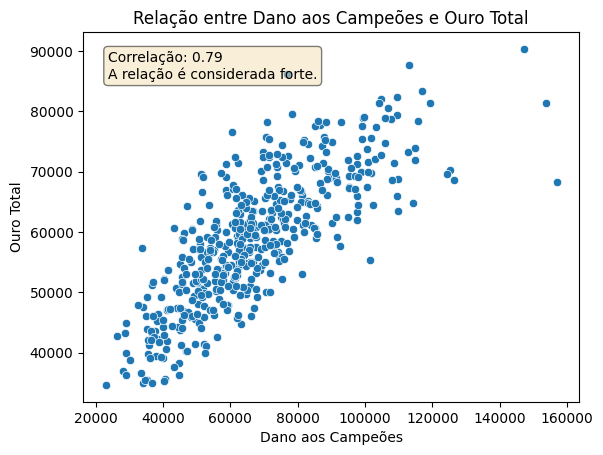

In [48]:
# Calculando a correlação entre as variáveis
correlation = df['damagetochampions'].corr(df['totalgold'])

# Mensagem sobre a força da relação
if abs(correlation) >= 0.7:
    strength_message = "A relação é considerada forte."
elif abs(correlation) >= 0.4:
    strength_message = "A relação é moderada."
else:
    strength_message = "A relação é considerada fraca."

# Visualização da relação
sns.scatterplot(x='damagetochampions', y='totalgold', data=df)
plt.title('Relação entre Dano aos Campeões e Ouro Total')
plt.xlabel('Dano aos Campeões')
plt.ylabel('Ouro Total')
plt.text(0.05, 0.95, f"Correlação: {correlation:.2f}\n{strength_message}", transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()
